In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('D:\Data Science\Datasets\income.csv')

data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0.5, 1.0, 'Age Vs Income')

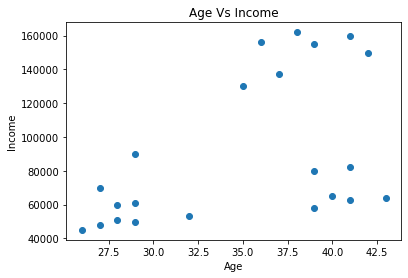

In [3]:
plt.scatter(data['Age'], data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title("Age Vs Income")

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [7]:
data['predicted'] = y_predicted

data.head()

,Name,Age,Income($),predicted
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [9]:
dir(km)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 '

In [10]:
km.labels_

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [11]:
km.inertia_

1577046058.883117

In [12]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

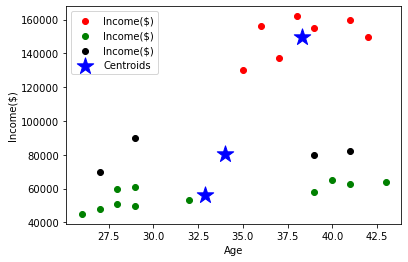

In [23]:
df0 = data[data['predicted'] == 0]
df1 = data[data['predicted'] == 1]
df2 = data[data['predicted'] == 2]

plt.scatter(df0.Age, df0['Income($)'], color = 'red', label = "Income($)")
plt.scatter(df1.Age, df1['Income($)'], color = 'green', label = "Income($)")
plt.scatter(df2.Age, df2['Income($)'], color = 'black', label = "Income($)")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], marker = '*', s = 300, color = 'blue', label = 'Centroids')
plt.xlabel('Age')
plt.ylabel("Income($)")
plt.legend()

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data[["Income($)"]])
data["Income($)"] = scaler.transform(data[["Income($)"]])


scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

In [25]:
data.head()

,Name,Age,Income($),predicted
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [27]:
data.drop('predicted', axis = 1, inplace = True)

In [28]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [30]:
data['predicted'] = y_predicted

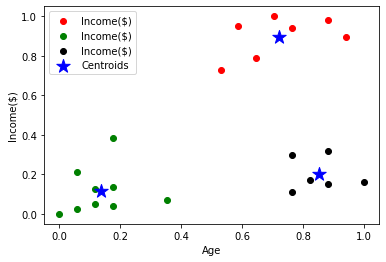

In [31]:
df0 = data[data['predicted'] == 0]
df1 = data[data['predicted'] == 1]
df2 = data[data['predicted'] == 2]

plt.scatter(df0.Age, df0['Income($)'], color = 'red', label = "Income($)")
plt.scatter(df1.Age, df1['Income($)'], color = 'green', label = "Income($)")
plt.scatter(df2.Age, df2['Income($)'], color = 'black', label = "Income($)")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], marker = '*', s = 200, color = 'blue', label = 'Centroids')
plt.xlabel('Age')
plt.ylabel("Income($)")
plt.legend()

In [35]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(data[['Age', "Income($)"]])
    sse.append(km.inertia_)

In [36]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2755825568722976,
 0.22020960864009395,
 0.16869711728567788,
 0.13265419827245162,
 0.10497488680620906]

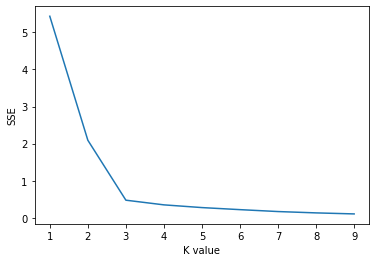

In [37]:
plt.xlabel('K value')
plt.ylabel("SSE")
plt.plot(k_rng, sse)

In [38]:
## Elbow menthod helps to find the no. of. centroids. In this case K = 3

In [39]:
km.labels_

array([6, 0, 6, 6, 1, 5, 1, 5, 5, 4, 4, 3, 3, 3, 6, 8, 7, 7, 7, 2, 2, 7])